# Imports

In [1]:
import numpy as np
import os, cv2, matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import metrics
from google.colab.patches import cv2_imshow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RNN, Dense, Dropout, BatchNormalization, SimpleRNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Flatten
from keras.saving import load_model
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Load dataset

In [2]:
X_train = np.load("/content/drive/MyDrive/DAT255_Semesterproject/processed_data/X_train.npy")
X_test = np.load("/content/drive/MyDrive/DAT255_Semesterproject/processed_data/X_test.npy")
y_train = np.load("/content/drive/MyDrive/DAT255_Semesterproject/processed_data/y_train.npy")
y_test = np.load("/content/drive/MyDrive/DAT255_Semesterproject/processed_data/y_test.npy")
n_classes = 6

LABELS = [
    "JUMPING",
    "JUMPING_JACKS",
    "BOXING",
    "WAVING_2HANDS",
    "WAVING_1HAND",
    "CLAPPING_HANDS"
]

# Convert labels to categorical
y_train_cat = to_categorical(y_train, num_classes=n_classes)
early_stop = EarlyStopping(monitor='loss', patience=2)

# Testing LSTM models

Simple unidirectional LSTM

In [3]:
uni_lstm_model_0 = Sequential([
    LSTM(128, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dense(n_classes, activation='softmax')
])

uni_lstm_model_0.compile(optimizer=Adam(0.00001), # For LSTM 0.0001 was too high.
              loss='categorical_crossentropy',
              metrics=['accuracy'])

uni_lstm_model_0.summary()

history = uni_lstm_model_0.fit(X_train, y_train_cat, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stop])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        83,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,742 (331.02 KB)

 Trainable params: 84,486 (330.02 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.2450 - loss: 1.8538 - val_accuracy: 0.3667 - val_loss: 1.5589
Epoch 2/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.3918 - loss: 1.5185 - val_accuracy: 0.5056 - val_loss: 1.2659
Epoch 3/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.5276 - loss: 1.1884 - val_accuracy: 0.6662 - val_loss: 0.8954
Epoch 4/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6637 - loss: 0.8763 - val_accuracy: 0.7097 - val_loss: 0.7543
Epoch 5/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7053 - loss: 0.7466 - val_accuracy: 0.7485 - val_loss: 0.6523
Epoch 6/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7308 - loss: 0.6750 - val_accuracy: 0.7666 - val_loss: 0.5938
Epoch 7/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7524 - loss: 0.6258 - val_accuracy: 0.7839 - val_loss: 0.5562
Epoch 8/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7637 - loss: 0

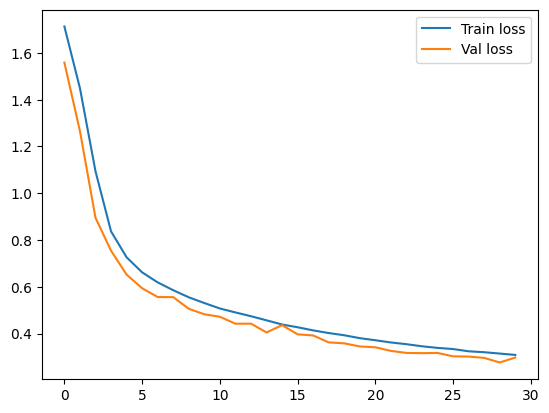

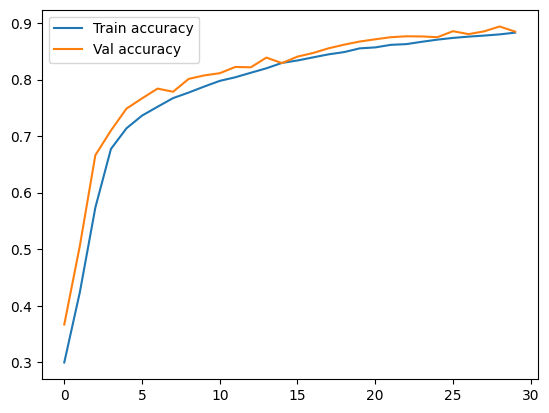

In [4]:
plt.plot(history.history['loss'],label = 'Train loss')
plt.plot(history.history['val_loss'],label = 'Val loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label = 'Train accuracy')
plt.plot(history.history['val_accuracy'],label = 'Val accuracy')
plt.legend()
plt.show()

More complex unidirectional model

In [5]:
uni_lstm_model_1 = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    LSTM(64, return_sequences=False),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='tanh'),
    Dense(n_classes, activation='softmax')
])

uni_lstm_model_1.compile(optimizer=Adam(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

uni_lstm_model_1.summary()

history = uni_lstm_model_1.fit(X_train, y_train_cat, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stop])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 32, 128)        │        83,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 135,910 (530.90 KB)

 Trainable params: 135,526 (529.40 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.4821 - loss: 1.2982 - val_accuracy: 0.7277 - val_loss: 0.7197
Epoch 2/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7865 - loss: 0.5555 - val_accuracy: 0.8632 - val_loss: 0.3584
Epoch 3/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - accuracy: 0.8496 - loss: 0.4094 - val_accuracy: 0.8533 - val_loss: 0.3953
Epoch 4/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8870 - loss: 0.3119 - val_accuracy: 0.9131 - val_loss: 0.2412
Epoch 5/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.9141 - loss: 0.2452 - val_accuracy: 0.8996 - val_loss: 0.2760
Epoch 6/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - accuracy: 0.9253 - loss: 0.2122 - val_accuracy: 0.8943 - val_loss: 0.3177
Epoch 7/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9383 - loss: 0.1794 - val_accuracy: 0.9553 - val_loss: 0.1254
Epoch 8/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9469 -

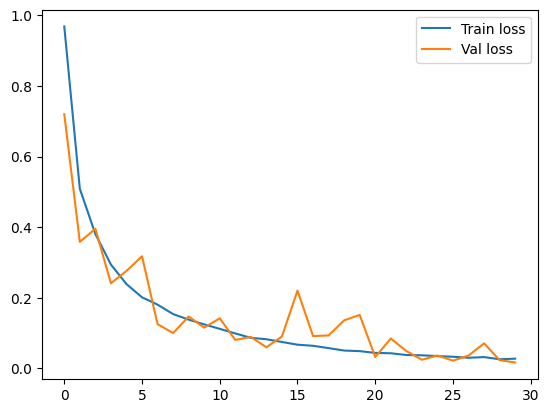

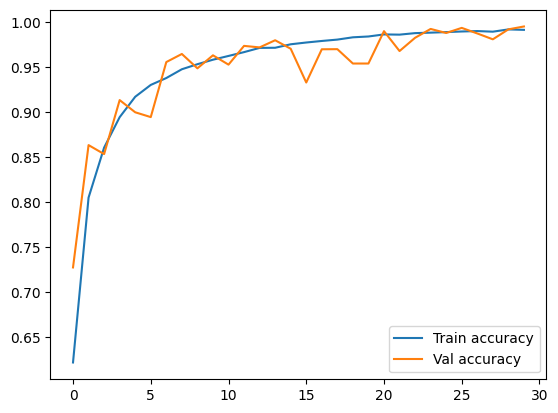

In [6]:
plt.plot(history.history['loss'],label = 'Train loss')
plt.plot(history.history['val_loss'],label = 'Val loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label = 'Train accuracy')
plt.plot(history.history['val_accuracy'],label = 'Val accuracy')
plt.legend()
plt.show()

Simple bidirectional model

In [7]:
from tensorflow.keras.layers import Bidirectional

bi_lstm_model_0 = Sequential([
    Bidirectional(LSTM(128, return_sequences=False), input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dense(n_classes, activation='softmax')
])

bi_lstm_model_0.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
bi_lstm_model_0.summary()

history = bi_lstm_model_0.fit(X_train, y_train_cat, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stop])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 256)            │       166,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169,478 (662.02 KB)

 Trainable params: 168,966 (660.02 KB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.4936 - loss: 1.2649 - val_accuracy: 0.7749 - val_loss: 0.5759
Epoch 2/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - accuracy: 0.7932 - loss: 0.5142 - val_accuracy: 0.8471 - val_loss: 0.3933
Epoch 3/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8430 - loss: 0.3913 - val_accuracy: 0.8570 - val_loss: 0.3424
Epoch 4/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8720 - loss: 0.3259 - val_accuracy: 0.9075 - val_loss: 0.2447
Epoch 5/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.8921 - loss: 0.2791 - val_accuracy: 0.8879 - val_loss: 0.2726
Epoch 6/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9116 - loss: 0.2385 - val_accuracy: 0.9181 - val_loss: 0.2152
Epoch 7/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9175 - loss: 0.2155 - val_accuracy: 0.9308 - val_loss: 0.1853
Epoch 8/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.9297 - l

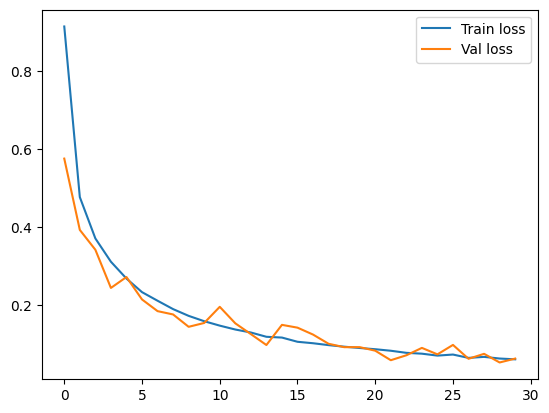

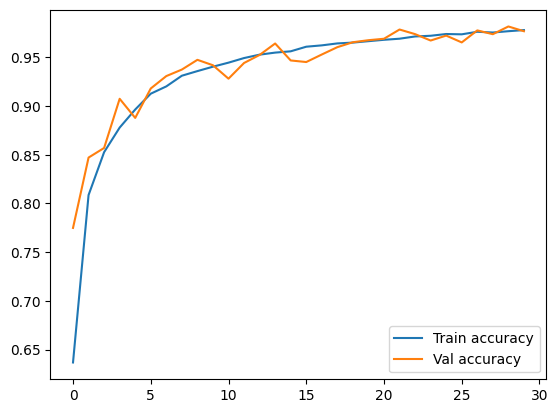

In [8]:
plt.plot(history.history['loss'],label = 'Train loss')
plt.plot(history.history['val_loss'],label = 'Val loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label = 'Train accuracy')
plt.plot(history.history['val_accuracy'],label = 'Val accuracy')
plt.legend()
plt.show()

More complex bidirectional model

In [9]:
bi_lstm_model_1 = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),

    Bidirectional(LSTM(64, return_sequences=False)),
    BatchNormalization(),

    Dense(32, activation='tanh'),
    Dropout(0.3),
    Dense(n_classes, activation='softmax')

])

bi_lstm_model_1.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
bi_lstm_model_1.summary()

history = bi_lstm_model_1.fit(X_train, y_train_cat, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stop])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional) │ (None, 32, 256)        │       166,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337,126 (1.29 MB)

 Trainable params: 336,358 (1.28 MB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - accuracy: 0.5806 - loss: 1.0967 - val_accuracy: 0.8401 - val_loss: 0.4254
Epoch 2/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.8549 - loss: 0.4054 - val_accuracy: 0.8568 - val_loss: 0.4055
Epoch 3/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.9053 - loss: 0.2728 - val_accuracy: 0.9381 - val_loss: 0.1743
Epoch 4/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.9330 - loss: 0.1958 - val_accuracy: 0.9554 - val_loss: 0.1337
Epoch 5/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 44s 18ms/step - accuracy: 0.9454 - loss: 0.1622 - val_accuracy: 0.9483 - val_loss: 0.1406
Epoch 6/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9548 - loss: 0.1331 - val_accuracy: 0.9275 - val_loss: 0.1995
Epoch 7/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9609 - loss: 0.1164 - val_accuracy: 0.9643 - val_loss: 0.0936
Epoch 8/30
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 43s 17ms/step - accuracy: 0.9659 -

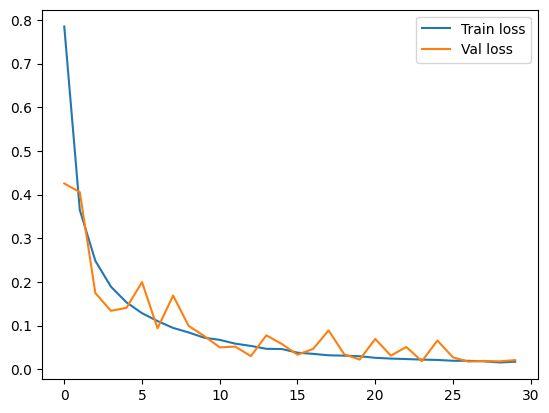

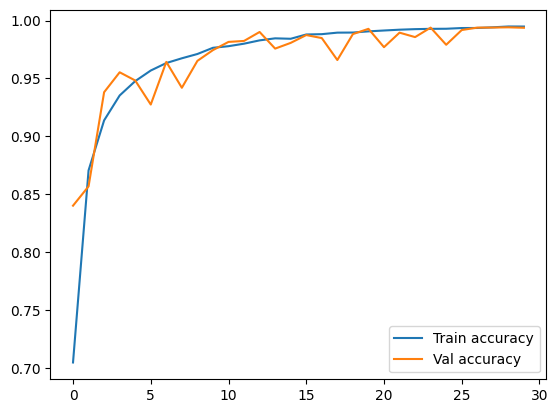

In [10]:
plt.plot(history.history['loss'],label = 'Train loss')
plt.plot(history.history['val_loss'],label = 'Val loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label = 'Train accuracy')
plt.plot(history.history['val_accuracy'],label = 'Val accuracy')
plt.legend()
plt.show()

# Testing the models

180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.8622848200312989
                precision    recall  f1-score   support

       JUMPING       0.88      0.96      0.92       676
 JUMPING_JACKS       0.83      0.85      0.84       783
        BOXING       0.85      0.75      0.79      1216
 WAVING_2HANDS       0.93      0.83      0.88      1320
  WAVING_1HAND       0.99      0.95      0.97      1313
CLAPPING_HANDS       0.56      0.89      0.69       443

      accuracy                           0.86      5751
     macro avg       0.84      0.87      0.85      5751
  weighted avg       0.88      0.86      0.87      5751



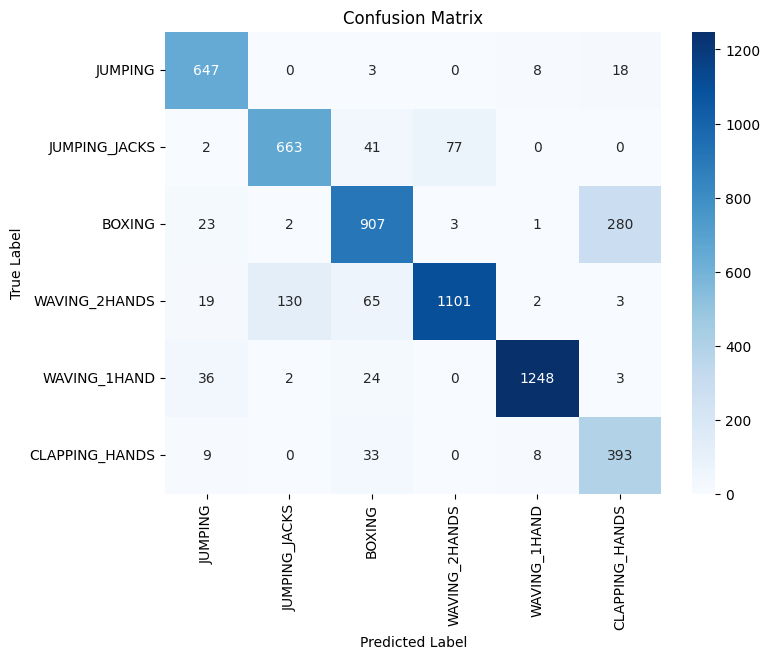

In [11]:
y_pred = uni_lstm_model_0.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test
accuracy = metrics.accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy:", accuracy)
print(metrics.classification_report(y_test_classes, y_pred_classes, target_names=LABELS))
conf_matrix = metrics.confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=LABELS, yticklabels=LABELS)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy: 0.9923491566684055
                precision    recall  f1-score   support

       JUMPING       1.00      1.00      1.00       676
 JUMPING_JACKS       0.99      1.00      1.00       783
        BOXING       0.99      0.98      0.99      1216
 WAVING_2HANDS       1.00      1.00      1.00      1320
  WAVING_1HAND       1.00      1.00      1.00      1313
CLAPPING_HANDS       0.96      0.96      0.96       443

      accuracy                           0.99      5751
     macro avg       0.99      0.99      0.99      5751
  weighted avg       0.99      0.99      0.99      5751



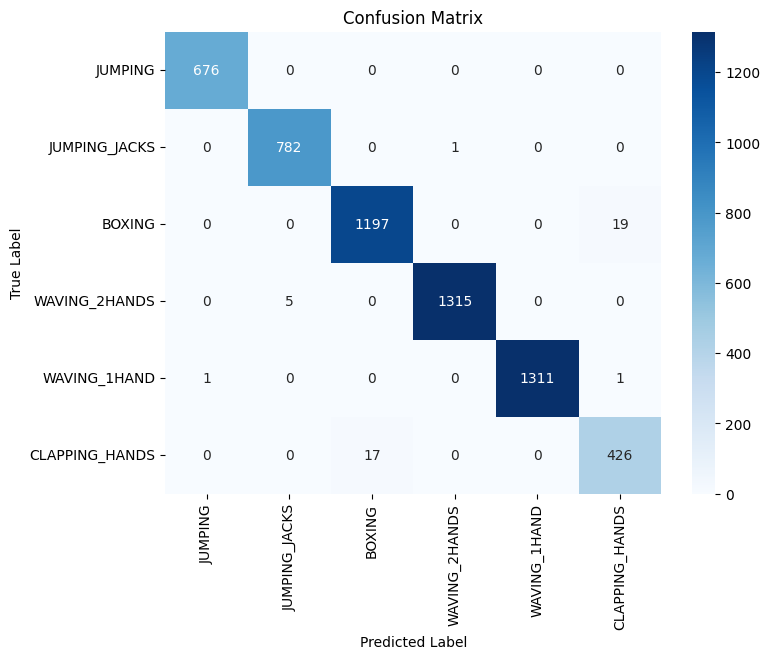

In [12]:
y_pred = uni_lstm_model_1.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test
accuracy = metrics.accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy:", accuracy)
print(metrics.classification_report(y_test_classes, y_pred_classes, target_names=LABELS))
conf_matrix = metrics.confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=LABELS, yticklabels=LABELS)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy: 0.9687010954616588
                precision    recall  f1-score   support

       JUMPING       0.99      0.96      0.98       676
 JUMPING_JACKS       0.99      0.98      0.99       783
        BOXING       0.98      0.92      0.95      1216
 WAVING_2HANDS       0.98      0.99      0.99      1320
  WAVING_1HAND       0.99      0.99      0.99      1313
CLAPPING_HANDS       0.80      0.96      0.87       443

      accuracy                           0.97      5751
     macro avg       0.95      0.97      0.96      5751
  weighted avg       0.97      0.97      0.97      5751



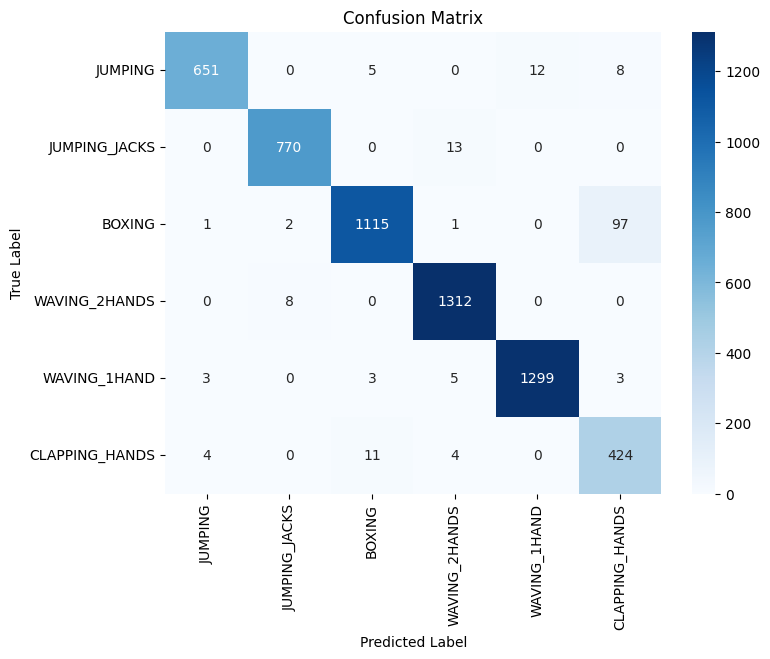

In [13]:
y_pred = bi_lstm_model_0.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test
accuracy = metrics.accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy:", accuracy)
print(metrics.classification_report(y_test_classes, y_pred_classes, target_names=LABELS))
conf_matrix = metrics.confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=LABELS, yticklabels=LABELS)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Accuracy: 0.9913058598504608
                precision    recall  f1-score   support

       JUMPING       0.99      1.00      1.00       676
 JUMPING_JACKS       1.00      1.00      1.00       783
        BOXING       1.00      0.97      0.98      1216
 WAVING_2HANDS       1.00      1.00      1.00      1320
  WAVING_1HAND       1.00      1.00      1.00      1313
CLAPPING_HANDS       0.92      0.99      0.95       443

      accuracy                           0.99      5751
     macro avg       0.98      0.99      0.99      5751
  weighted avg       0.99      0.99      0.99      5751



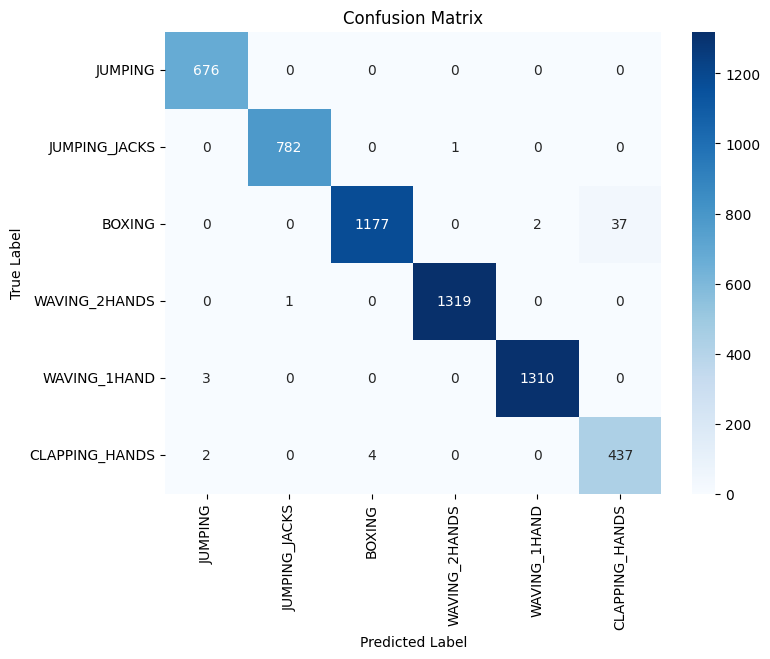

In [14]:
y_pred = bi_lstm_model_1.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test
accuracy = metrics.accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy:", accuracy)
print(metrics.classification_report(y_test_classes, y_pred_classes, target_names=LABELS))
conf_matrix = metrics.confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=LABELS, yticklabels=LABELS)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()